# Basal Scaling for Nu<sub>Top</sub>, Nu<sub>Bottom</sub>, and V<sub>RMS</sub>

In [196]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math
from sklearn.metrics import r2_score

%config InlineBackend.figure_formats = ['svg']

In [197]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 12.
plt.rcParams['lines.markeredgewidth'] = 0.7

In [198]:
save_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Data\\'
Data=pd.read_csv(save_path+'data_short.csv')
Data

,Ra,NuT,NuB,VRMS,Surface
0,1.000000e+04,4.656117,4.656052,34.289954,31.914000
1,1.000000e+05,11.254625,11.254650,168.172663,165.990000
2,1.000000e+06,23.502768,23.502513,703.962729,710.800000
3,3.000000e+06,31.091243,31.102263,1724.080856,1861.224138
4,1.000000e+07,45.752733,45.729992,3694.501261,3969.992941
5,3.000000e+07,64.545929,64.185931,7409.134055,7885.750000
6,1.000000e+08,82.274544,81.669792,8657.461368,8286.840800
7,3.000000e+08,128.210292,128.165251,28979.412563,30769.912037
8,6.000000e+08,163.818558,164.114764,47506.283676,50508.465035
9,1.000000e+09,173.733978,174.123207,43355.162240,40996.437276


In [199]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

dataS = [[] for i in range(lenRa)] #empty nested list for largest resolution value

for i in range(lenRa):
    dataS[i] = Data.loc[(Data['Ra'] == RaU[i])]
    
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

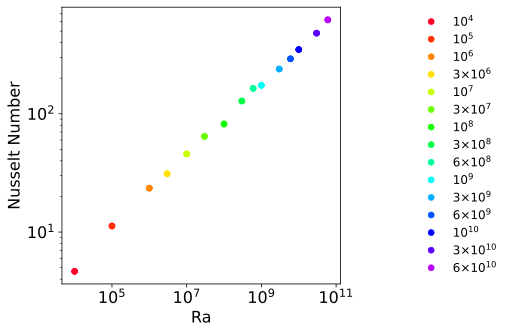

In [200]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'raw_nu.png',pad_inches=0.1,bbox_inches='tight');

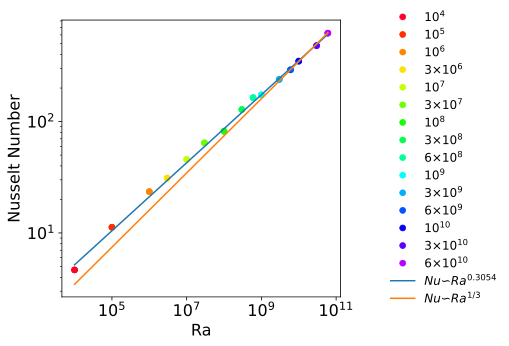

In [201]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_nu.png',pad_inches=0.1,bbox_inches='tight');

In [202]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
popt, pcov = curve_fit(fol,list1,list2)
y_pred = fol(list1, *popt)
r2_score(list2, y_pred)

0.9983405288998312

In [203]:
popt, pcov = curve_fit(fol2,list1,list2)
y_pred = fol2(np.array(list1), popt[0])
r2_score(list2, y_pred)

0.9950089119907759

In [204]:
np.array(list2)

array([  4.65611719,   4.65605192,  11.254625  ,  11.25465   ,
        23.50276821,  23.50251331,  31.09124348,  31.10226261,
        45.75273294,  45.72999235,  64.54592857,  64.18593143,
        82.27454439,  81.66979212, 128.21029189, 128.16525072,
       163.81855753, 164.11476381, 173.73397773, 174.1232067 ,
       239.05055291, 238.95573286, 291.51229826, 291.26026139,
       348.80571338, 349.15872601, 480.41730514, 480.34814857,
       623.17851923, 621.1235235 ])

In [113]:
y_pred

array([  4.16217197,   4.16217197,   8.96712767,   8.96712767,
        19.31909092,  19.31909092,  27.86295058,  27.86295058,
        41.62171966,  41.62171966,  60.0289073 ,  60.0289073 ,
        89.6712767 ,  89.6712767 , 129.32836029, 129.32836029,
       162.94352348, 162.94352348])

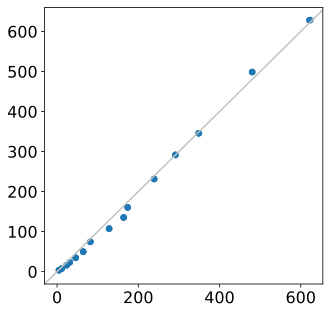

In [205]:
plt.plot(np.array(list2),y_pred,'.');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');

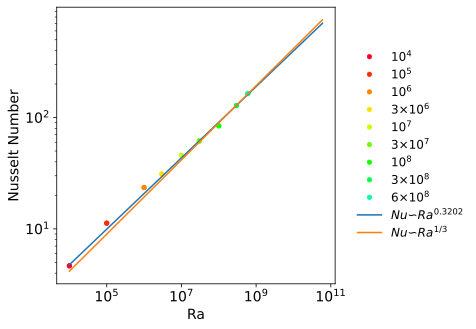

In [94]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa-6):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,RaU[lenRa-1],1e8)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_Nu_first ones.png',pad_inches=0.1,bbox_inches='tight');

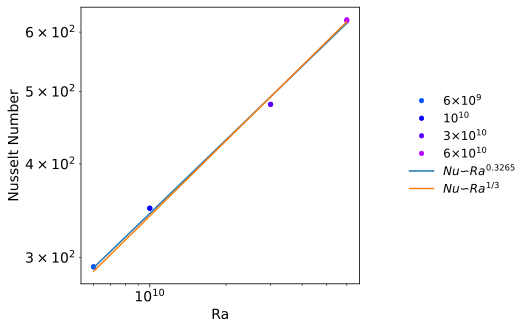

In [60]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa-4,lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])
#     print(i)
#     print(RaU[i])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(RaU[lenRa-4],np.max(RaU),1e8)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_Nu_last.png',pad_inches=0.1,bbox_inches='tight');

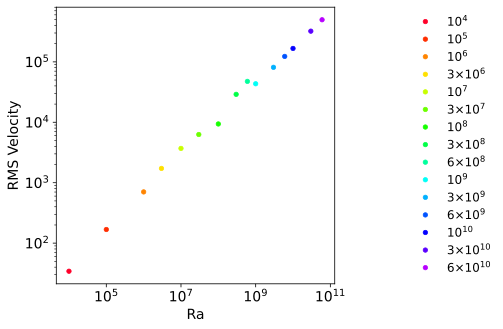

In [61]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'raw_vrms.png',pad_inches=0.1,bbox_inches='tight');

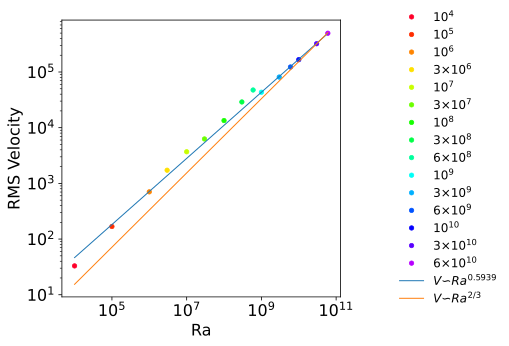

In [9]:
list1 = []; list2 = [];

for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    list1.append(Data.at[i, 'Ra']);
    list2.append(Data.at[i, 'VRMS']);

plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$V \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$V \backsim Ra^{2/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_vrms.png',pad_inches=0.1,bbox_inches='tight');

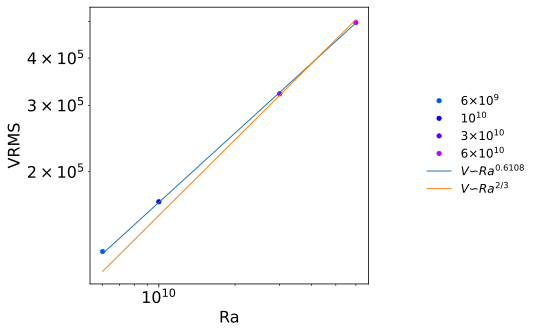

In [10]:
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa-4,lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    list1.append(Data.at[i, 'Ra']);
    list2.append(Data.at[i, 'VRMS']);

plt.ylabel('VRMS'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(RaU[lenRa-4],np.max(RaU),1e8)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$V \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$V \backsim Ra^{2/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

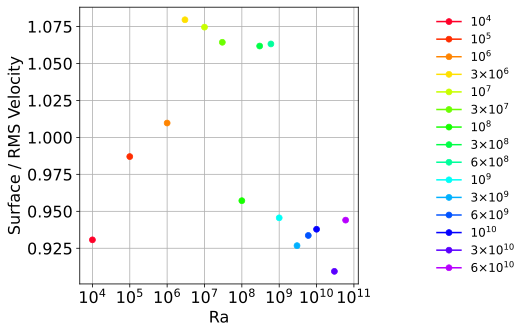

In [206]:
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['Surface']/Data.iloc[[i]]['VRMS'],'.-',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])

plt.ylabel('Surface / RMS Velocity'); plt.xlabel('Ra');
plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));
plt.grid()

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'valo_ratio.png',pad_inches=0.1,bbox_inches='tight');

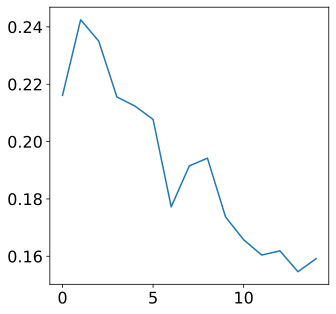

In [207]:
nuVSra = Data['NuT']/(Data['Ra']**(1/3))
plt.plot(nuVSra);

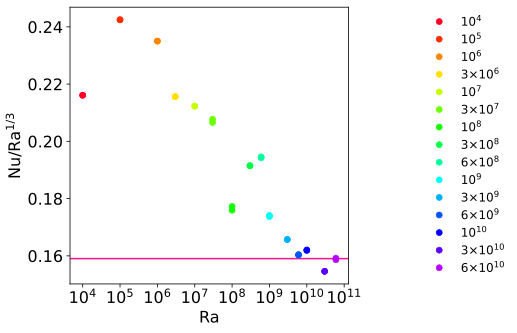

In [208]:
nu = plt.figure()
plt.axhline(np.mean(nuVSra[lenRa-4:lenRa]),color='deeppink');
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],(Data.iloc[[i]]['NuT'])/Data.iloc[[i]]['Ra']**(1/3),'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB']/Data.iloc[[i]]['Ra']**(1/3),'.',color=colors[i])


plt.ylabel('Nu/Ra$^{1/3}$'); plt.xlabel('Ra');
plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));
# plt.grid()

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

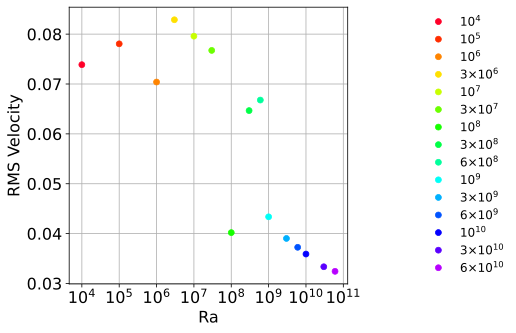

In [209]:
nu = plt.figure()
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],(Data.iloc[[i]]['VRMS'])/Data.iloc[[i]]['Ra']**(2/3),'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])


plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));
plt.grid()

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

## Plot Nu Raw + Fit

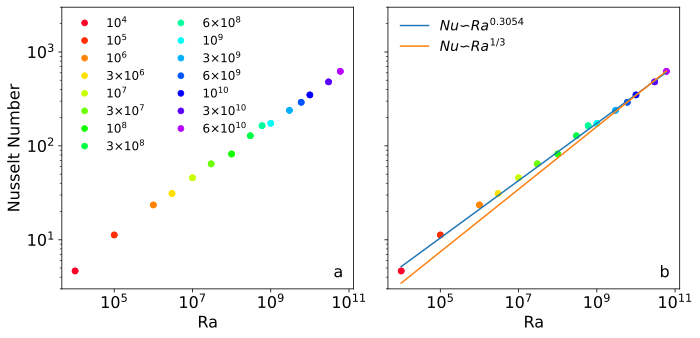

In [210]:
fig = plt.figure(figsize=(10,5))
plt.rcParams['lines.markersize'] = 12.
plt.rcParams['font.size'] = 16
plt.subplot(1,2,1)
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',color=colors[i],
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))))
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log'); plt.ylim(3,3000); plt.text(4e10,4,'a')
plt.legend(frameon=False,loc='upper left', ncol=2,prop={'size': 12});

ax2 = plt.subplot(1,2,2)
list1 = []; list2 = [];
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])
plt.xlabel('Ra'); plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2);
xx = np.arange(1e4,np.max(RaU),1e4); s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');
plt.legend(frameon=False,loc='upper left',prop={'size': 14});
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(4e10,4,'b'); plt.ylim(3,3000)
fig.tight_layout()

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu_both.png',pad_inches=0.1,bbox_inches='tight');

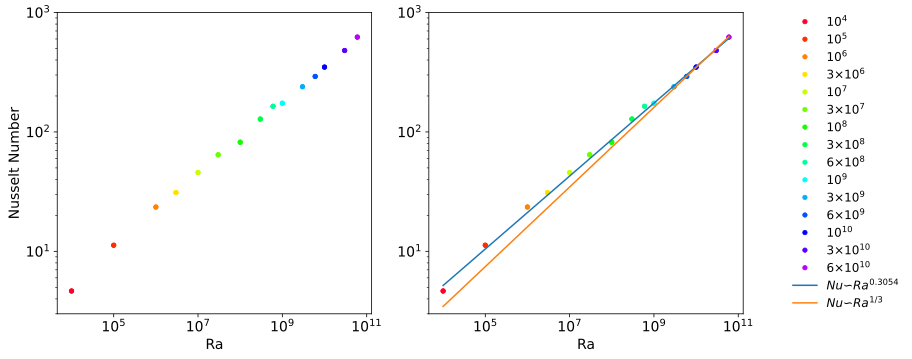

In [211]:
fig = plt.figure(figsize=(13,5.5))
plt.rcParams['lines.markersize'] = 9.
plt.rcParams['font.size'] = 14
plt.subplot(1,2,1)
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',color=colors[i],
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))))
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log'); plt.ylim(3,1000);

ax2 = plt.subplot(1,2,2)
list1 = []; list2 = [];
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',color=colors[i],
            label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))))
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])
plt.xlabel('Ra'); plt.yscale('log'); plt.xscale('log');

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.53, 0.5));
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylim(3,1000)
fig.tight_layout()

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu_both_out.png',pad_inches=0.1,bbox_inches='tight');

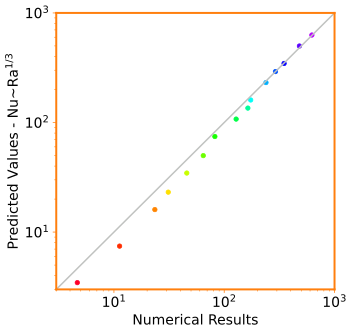

In [212]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
popt, pcov = curve_fit(fol2,list1,list2)
y_pred = fol2(np.array(list1), popt[0])
r2_score(list2, y_pred)
y_pred_top = [y_pred[i] for i in range(lenRa*2) if i%2==0]
for i in range(lenRa):
    plt.plot(Data['NuT'][i],y_pred_top[i],'.',color=colors[i], label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))))
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values - Nu~Ra$^{1/3}$')
# plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
plt.yscale('log'); plt.xscale('log');
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)  # change width
    ax.spines[axis].set_color('tab:orange')    # change color
ax.tick_params(color='tab:orange',which='both')
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu predicted vs results.png',pad_inches=0.1,bbox_inches='tight');

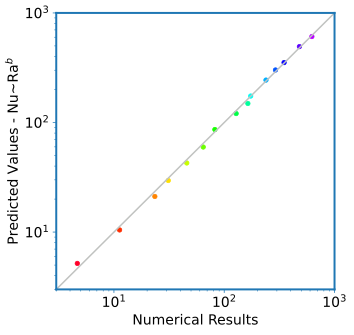

In [213]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
popt, pcov = curve_fit(fol,list1,list2)
y_pred = fol(np.array(list1), *popt)
r2_score(list2, y_pred)
y_pred_top = [y_pred[i] for i in range(lenRa*2) if i%2==0]
for i in range(lenRa):
    plt.plot(Data['NuT'][i],y_pred_top[i],'.',color=colors[i], label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))))
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values - Nu~Ra$^{b}$')
# plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
plt.yscale('log'); plt.xscale('log');
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)  # change width
    ax.spines[axis].set_color('tab:blue')    # change color
ax.tick_params(color='tab:blue',which='both')
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu predicted vs results best fit.png',pad_inches=0.1,bbox_inches='tight');

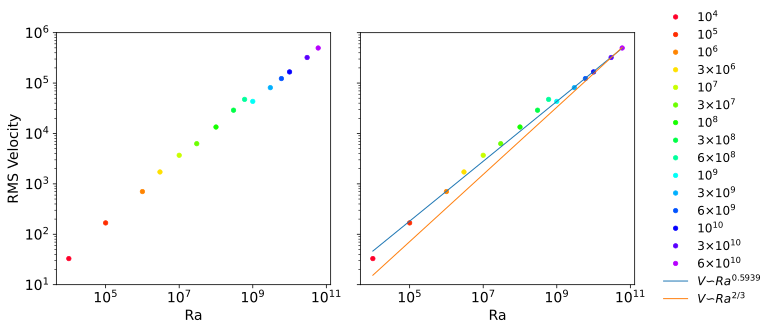

In [107]:
fig = plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',color=colors[i])
    
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.ylim(10,1e6); plt.yticks(np.logspace(1,6,num=6))

ax2 = plt.subplot(1,2,2)
list1 = []; list2 = [];

for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    list1.append(Data.at[i, 'Ra']);
    list2.append(Data.at[i, 'VRMS']);

plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4);
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$V \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$V \backsim Ra^{2/3}$');
plt.ylim(10,1e6)
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
plt.setp(ax2.get_yticklabels(), visible=False);

fig.tight_layout();

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'vrms_both.png',pad_inches=0.1,bbox_inches='tight');

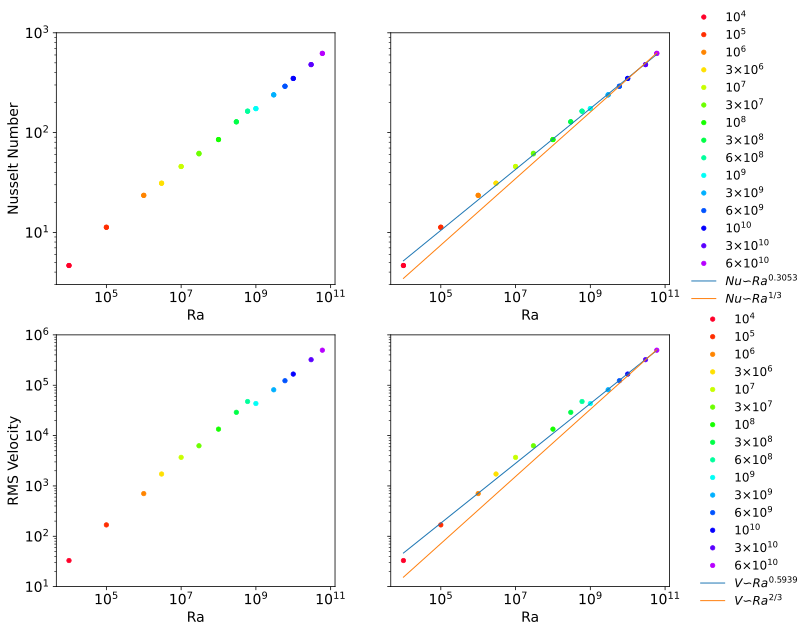

In [108]:
fig = plt.figure(figsize=(11,10))

plt.subplot(2,2,1)
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.ylim(3,1000)

ax2 = plt.subplot(2,2,2)
list1 = []; list2 = [];
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuT'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['NuB'],'.',color=colors[i])
    list1.append(Data.at[i, 'Ra']); list1.append(Data.at[i, 'Ra'])
    list2.append(Data.at[i, 'NuT']); list2.append(Data.at[i, 'NuB'])

plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');
plt.ylim(3,1000)
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
plt.setp(ax2.get_yticklabels(), visible=False)

plt.subplot(223)
for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',color=colors[i])
    
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.ylim(10,1e6); plt.yticks(np.logspace(1,6,num=6))

ax2 = plt.subplot(224)
list1 = []; list2 = [];

for i in range(lenRa):
    plt.plot(Data.iloc[[i]]['Ra'],Data.iloc[[i]]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
    list1.append(Data.at[i, 'Ra']);
    list2.append(Data.at[i, 'VRMS']);

plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,np.max(RaU),1e4);
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$V \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$V \backsim Ra^{2/3}$');
plt.ylim(10,1e6)
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
plt.setp(ax2.get_yticklabels(), visible=False);

# fig.tight_layout();

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu_vrms_both.png',pad_inches=0.1,bbox_inches='tight');